# 1. Uvod
### Opis problema
V tem projektu napovedujem število pretečenih yardov posameznih igralcev v National Football League (NFL). Cilj je razviti model, ki lahko predvidi uspešnost igralcev glede na različne dejavnike, kot so število poskusov, povprečje yardov na igro, in druge statistike. To bi lahko pomagalo trenerjem, igralcem in analitikom pri boljšem razumevanju ključnih dejavnikov uspešnosti v igri in pri odločanju izbire primernega igralca.
### Opis podatkov
Podatki, uporabljeni v tem projektu, so bili pridobljeni s spletne strani https://www.footballdb.com/statistics/nfl/player-stats/rushing/2022/regular-season. Vključujejo različne statistike igralcev NFL za sezono 2022, med drugim:

Ime igralca
Ekipa: Ekipa, za katero igralec igra.
Gms (Games): Število odigranih iger.
Att (Attempts): Število poskusov teka.
Yds (Yards): Skupno število pretečenih yardov (ciljna spremenljivka za napovedovanje).
Avg (Average): Povprečje yardov na poskus.
YPG (Yards Per Game): Povprečje yardov na igro.
Lg (Longest Run): Najdaljši tek v sezoni.
TD (Touchdowns): Število doseženih touchdownov.
FD (First Downs): Število osvojenih prvih downov.

# 2. Uvoz podatkov

In [1]:
import pandas as pd

df = pd.read_csv('../scrapper/player_stats.csv', index_col='Player', sep=",", decimal=".")
df.head()


,Team,Gms,Att,Yds,Avg,YPG,Lg,TD,FD
Player,,,,,,,,,
Josh JacobsJ. Jacobs,LV,17,340,"1,653",4.86,97.2,86t,12,93
Derrick HenryD. Henry,TEN,16,349,"1,538",4.41,96.1,56,13,65
Nick ChubbN. Chubb,CLE,17,302,"1,525",5.05,89.7,41t,12,69
Saquon BarkleyS. Barkley,NYG,16,295,"1,312",4.45,82.0,68,10,62
Miles SandersM. Sanders,PHI,17,259,"1,269",4.90,74.7,40t,11,62


# 3. Analiza podatkov

### Prikaz osnovnih statistik za numerične spremenljivke

In [2]:
#odstranitev oznake t iz stolpca Lg (nepomeben podatke za moj model)
df['Lg'] = df['Lg'].str.replace('t', '').astype(float)

# Odstranjevanje neželenih znakov iz stolpca 'Yds' (npr. vejice)
df['Yds'] = df['Yds'].str.replace(',', '')

# Pretvorba stolpca 'Yds' iz nizov v števila
df['Yds'] = pd.to_numeric(df['Yds'])

df.describe()

,Gms,Att,Yds,Avg,YPG,Lg,TD,FD
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,11.801090,40.245232,179.547684,4.178120,14.300000,18.517711,1.326975,10.043597
std,5.173091,66.662102,309.386873,4.131635,20.823746,17.641360,2.552596,16.176055
min,1.000000,0.000000,-18.000000,-9.000000,-2.500000,-8.000000,0.000000,0.000000
25%,8.000000,3.000000,8.000000,2.170000,0.800000,5.000000,0.000000,1.000000
50%,13.000000,9.000000,41.000000,4.000000,5.000000,14.000000,0.000000,3.000000
75%,16.000000,42.000000,172.500000,5.130000,17.300000,25.000000,1.000000,10.000000
max,17.000000,349.000000,1653.000000,40.000000,97.200000,86.000000,17.000000,93.000000


###  Razpršeni diagram za prikaz povezave med poskusi in pretečenimi yardi

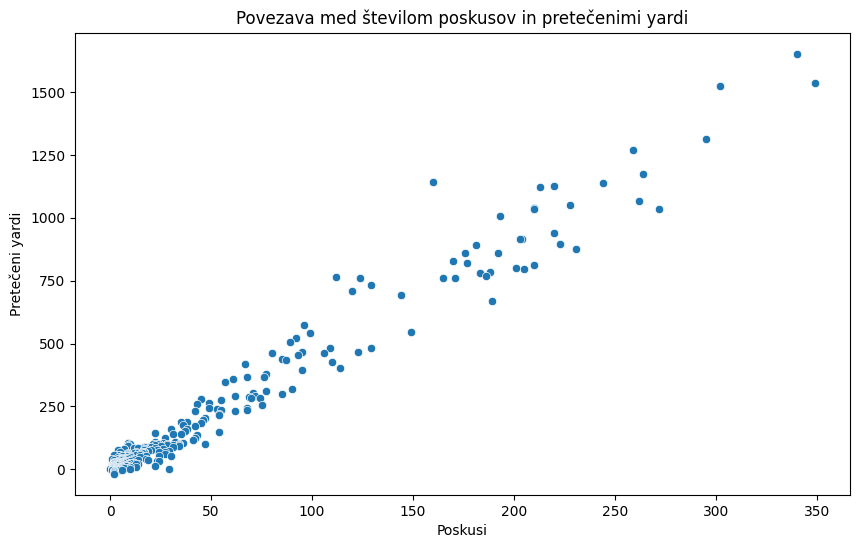

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Att', y='Yds', data=df)
plt.title('Povezava med številom poskusov in pretečenimi yardi')
plt.xlabel('Poskusi')
plt.ylabel('Pretečeni yardi')
plt.show()


### Število igralcev po ekipah

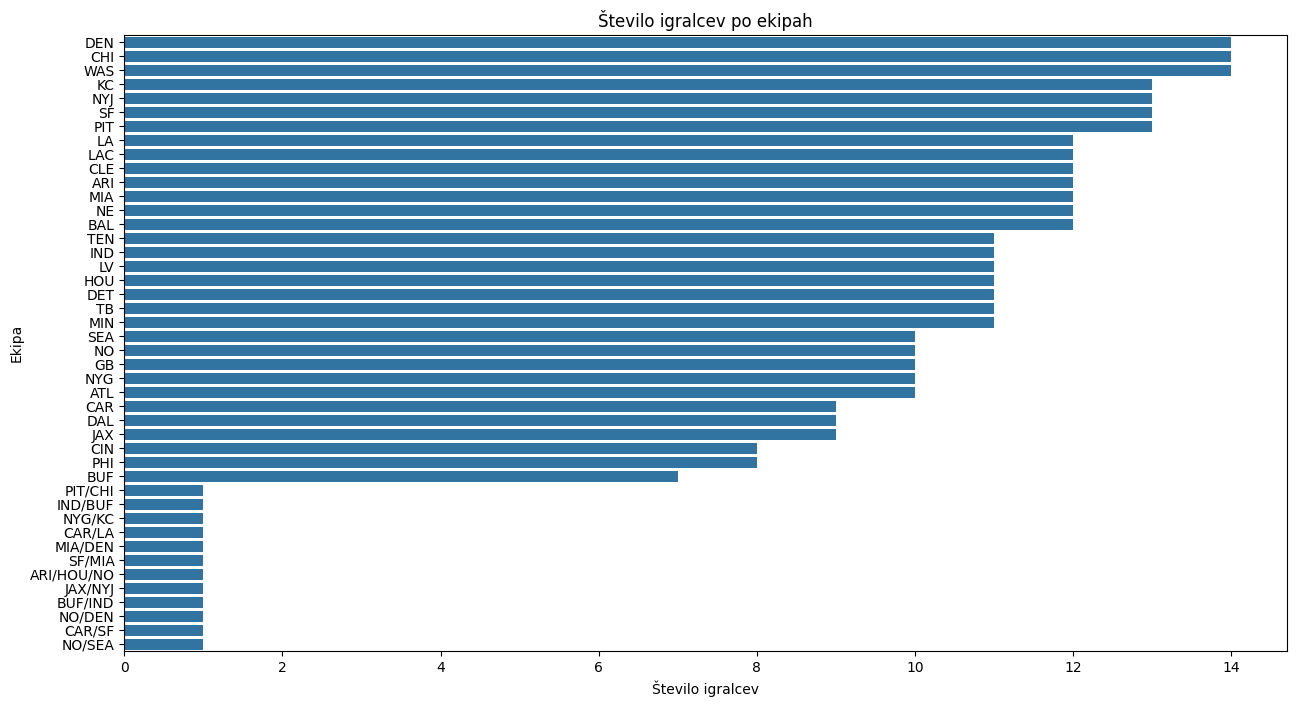

In [7]:

plt.figure(figsize=(15, 8))
sns.countplot(y='Team', data=df, order = df['Team'].value_counts().index)
plt.title('Število igralcev po ekipah')
plt.xlabel('Število igralcev')
plt.ylabel('Ekipa')
plt.show()


### Prikaz korelacij med numeričnimi spremenljivkami
1 pomeni popolno pozitivno korelacijo: ko se ena spremenljivka poveča, se tudi druga poveča.

-1 pomeni popolno negativno korelacijo: ko se ena spremenljivka poveča, se druga zmanjša.

0 pomeni, da med spremenljivkama ni linearne korelacije.

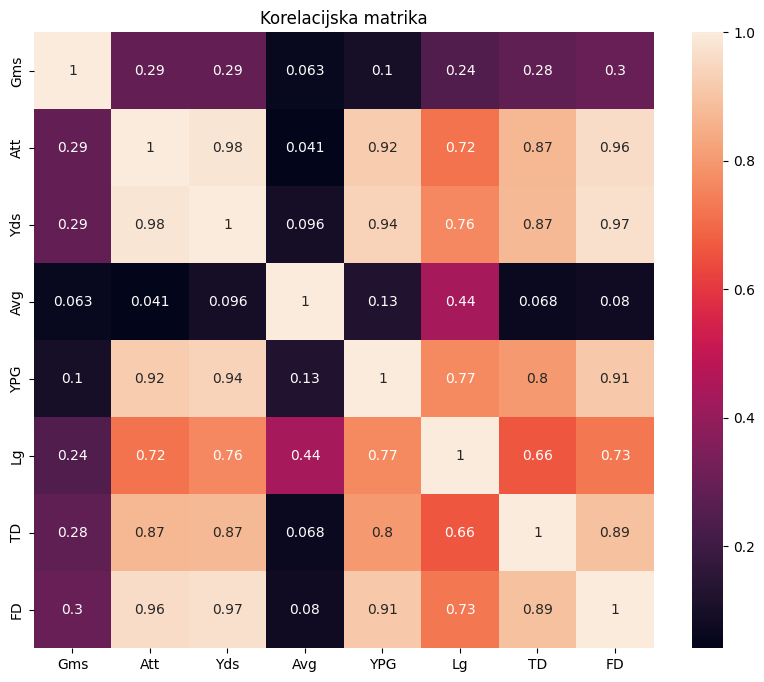

In [8]:
stevilski = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(stevilski.corr(), annot=True)
plt.title('Korelacijska matrika')
plt.show()


# 4. Predprocesiranje podatkov

In [9]:
print(df.isnull().sum())

Team    0
Gms     0
Att     0
Yds     0
Avg     0
YPG     0
Lg      0
TD      0
FD      0
dtype: int64


In [4]:
# Pretvorba kategoricnih podatkov v numerične (LabelEncoder)
from sklearn.preprocessing import LabelEncoder
kategoricni_podatki = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for stolpec in kategoricni_podatki:
    df[stolpec] = label_encoder.fit_transform(df[stolpec])

# Standardizacija podatkov
from sklearn.preprocessing import StandardScaler
stevilski_stolpci = df.select_dtypes(include=['number']).columns.drop('Yds')
scaler = StandardScaler()
df[stevilski_stolpci] = scaler.fit_transform(df[stevilski_stolpci])

df.head()

,Team,Gms,Att,Yds,Avg,YPG,Lg,TD,FD
Player,,,,,,,,,
Josh JacobsJ. Jacobs,0.158610,1.006363,4.502768,1653,0.165264,3.986467,3.830454,4.186952,5.135347
Derrick HenryD. Henry,1.582217,0.812791,4.637962,1538,0.056200,3.933570,2.127583,4.579244,3.402030
Nick ChubbN. Chubb,-0.869551,1.006363,3.931951,1525,0.211314,3.625809,1.276148,4.186952,3.649647
Saquon BarkleyS. Barkley,0.791324,0.812791,3.826800,1312,0.065894,3.255534,2.808731,3.402366,3.216318
Miles SandersM. Sanders,1.028592,1.006363,3.286026,1269,0.174959,2.904495,1.219385,3.794659,3.216318


# 5. Metoda strojnega učenja (Odločitveno drevo)

In [5]:
vhod = df.drop(['Yds'], axis=1)
izhod = df['Yds']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(vhod, izhod, test_size=0.25, random_state=321)

from sklearn.tree import DecisionTreeRegressor
regresijsko_drevo = DecisionTreeRegressor()
regresijsko_drevo.fit(x_train, y_train)
napoved = regresijsko_drevo.predict(x_test)

In [6]:
rezultati = pd.DataFrame({
    'Dejanske vrednosti': y_test,
    'Napovedane vrednosti': napoved
})

print("Prvih pet primerov:")
print(rezultati.head())

print("\nZadnjih pet primerov:")
print(rezultati.tail())

Prvih pet primerov:
                           Dejanske vrednosti  Napovedane vrednosti
Player                                                             
Baker MayfieldB. Mayfield                  89                  94.0
Jaelon DardenJ. Darden                      2                   4.0
Deon JacksonD. Jackson                    236                 318.0
Matthias FarleyM. Farley                   -3                  -3.0
Ashtyn DavisA. Davis                        2                   2.0

Zadnjih pet primerov:
                            Dejanske vrednosti  Napovedane vrednosti
Player                                                              
Phillip LindsayP. Lindsay                   49                  61.0
Keenan AllenK. Allen                         8                  11.0
Christian WatsonC. Watson                   80                  65.0
Isaiah McKenzieI. McKenzie                  55                  53.0
D'Andre SwiftD. Swift                      542                 425.

##   5.1 Metrike (R2, MSE, MAE)


##### 1. Mean Squared Error (MSE)
Opis: MSE je povprečje kvadratov napak med napovedanimi in dejanskimi vrednostmi. Ta metrika kaznuje večje napake bolj strogo, saj jih kvadrira.

Interpretacija: Nižja vrednost MSE pomeni boljše prileganje modela. Vrednost je vedno pozitivna; bližje kot je 0, boljše je.
##### 2. R² (R kvadrat)
Opis: R², znan tudi kot koeficient določenosti, meri, kolikšen delež skupne variabilnosti ciljne spremenljivke je mogoče razložiti z uporabljenim modelom.

Interpretacija: Vrednosti se gibljejo od 0 do 1, kjer 1 pomeni popolno razlago. Višji R² kaže na boljše prileganje modela. Vendar pa previsoke vrednosti lahko kažejo na prenasičenje modela (overfitting).
##### 3. Mean Absolute Error (MAE)
Opis: MAE izračuna povprečje absolutnih vrednosti napak med napovedanimi in dejanskimi vrednostmi. Za razliko od MSE, MAE ne kvadrira napak.

Interpretacija: Podobno kot pri MSE, manjše vrednosti pomenijo boljše prileganje modela. MAE daje linearno oceno napak, kar olajša razumevanje v primerjavi z MSE.

In [7]:
from sklearn.metrics import mean_squared_error
print('MSE: ', mean_squared_error(y_test, napoved))

from sklearn.metrics import r2_score
print('R^2: ', r2_score(y_test, napoved))

from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(y_test, napoved))

MSE:  3002.521739130435
R^2:  0.9609805194199014
MAE:  25.847826086956523


# 6. Primerjava algoritmov s Križno Validacijo

In [8]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(kernel='linear'),
    'Random Forest': RandomForestRegressor(),
    'Extra Trees': ExtraTreesRegressor()
}
mae_scores = {}
kf = KFold(n_splits=5, random_state= 789, shuffle=True)
for name, model in models.items():
    scores = cross_val_score(model, vhod, izhod, scoring='neg_mean_absolute_error', cv=kf)
    mae_scores[name] = -scores.mean()
    print(f'{name}: MAE = {-scores.mean()}')

Linear Regression: MAE = 25.440070244618184
Decision Tree: MAE = 27.596630877452792
SVR: MAE = 33.32135656793115
Random Forest: MAE = 18.91094705664569
Extra Trees: MAE = 14.39556497593484


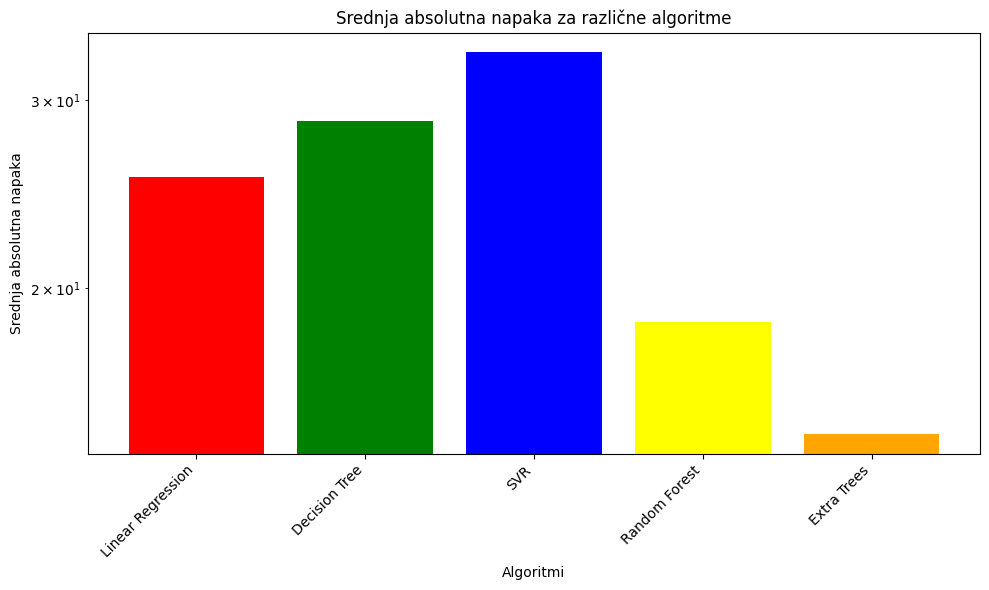

In [15]:
algorithm_names = list(mae_scores.keys())
mae_values = list(mae_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, mae_values, color=['red', 'green', 'blue', 'yellow', 'orange'])
plt.xlabel('Algoritmi')
plt.ylabel('Srednja absolutna napaka')
plt.title('Srednja absolutna napaka za različne algoritme')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Grid Search

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

kf = KFold(n_splits=10, random_state= 789, shuffle=True)

param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [5, 10, 15],
    'max_features': [None, 'sqrt', 'log2']
}
rf_regressor = RandomForestRegressor(random_state=789)

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=kf, scoring='r2')
grid_search.fit(vhod, izhod)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'squared_error', 'max_depth': 15, 'max_features': 'log2', 'n_estimators': 200}
0.9834488628782723


In [20]:
from sklearn.ensemble import RandomForestRegressor

testni_podatki = {
    'Team': ['DAL'],
    'Gms': [15],
    'Att': [244],
    'Avg': [4.01],
    'YPG': [65.3],
    'Lg': [31],
    'TD': [6],
    'FD': [62]
}

# Ustvarjanje DataFrame-a za testni podatek
testni_df = pd.DataFrame(testni_podatki)

testni_df['Team'] = label_encoder.transform(testni_df['Team'])
print(testni_df.head())
numeric_columns = ['Team','Gms', 'Att', 'Avg', 'YPG', 'Lg', 'TD', 'FD']
testni_df[numeric_columns] = scaler.transform(testni_df[numeric_columns])

# Nastavitev parametrov, ki jih je določil Grid Search
optimalni_parametri = {
    'criterion': 'squared_error',
    'max_depth': 15,
    'max_features': 'log2',
    'n_estimators': 200
}

# Ustvarjanje in usposabljanje modela z optimalnimi hiperparametri
optimalen_model = RandomForestRegressor(**optimalni_parametri, random_state=789)
optimalen_model.fit(x_train, y_train)

# Napovedovanje na testnem podatku
napoved_yardov = optimalen_model.predict(testni_df)


print("Napovedani yardi za testni podatek:", napoved_yardov[0])
print("Pravilni yardi za testni podatek: 979")

Napovedani yardi za testni podatek: 996.595
Pravilni yardi za testni podatek: 979


# 8. Analiza rezultatov

### - Odločitveno Drevo Regresija: 
Dosežen visok R² (0.96) kaže na dobro prilagoditev modela, vendar visoka MSE in MAE kažeta na potencial izboljšave pri natančnosti napovedi.

### - Primerjava Algoritmov:
'Random Forest' in 'Extra Trees' sta izstopala kot najnatančnejša algoritma. SVR je bil najslabši algoritem.

### - Grid Search: 
Izboljšanje s 'Random Forest', ki ga dokazuje visok R² (0.983), kaže na močno povezavo med izbranimi parametri in uspešnostjo modela.

### - Doprinos:
Ta analiza potrjuje, da so za napovedovanje športnih statistik, kot so yardi v nogometu, algoritmi 'Random Forest' in 'Extra Trees' učinkovitejši. Poleg tega optimizacija paramterov z Grid Search lahko znatno izboljša natančnost napovedi, kar je ključno za razvoj zanesljivih napovednih modelov v športni analitiki.